In [ ]:
import os

# List all files in the current directory
os.listdir('/content/')


['.config', 'sample_data']

In [ ]:
from google.colab import files

# Upload the zip file from your local machine
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file and where to extract it
zip_path = '/content/archive.zip'
extract_dir = '/content/fer2013/'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: /content/fer2013/


In [ ]:
# List the extracted files
os.listdir(extract_dir)


['test', 'train']

In [ ]:
import os
os.listdir('/content/fer2013/')


['test', 'train']

In [ ]:
import os

# List the contents of the train and test directories to see what files are present
train_files = os.listdir('/content/fer2013/train/')
test_files = os.listdir('/content/fer2013/test/')

print("Train files:", train_files[:5])  # Check first few files in train folder
print("Test files:", test_files[:5])    # Check first few files in test folder


Train files: ['angry', 'disgust', 'surprise', 'happy', 'fear']
Test files: ['angry', 'disgust', 'surprise', 'happy', 'fear']


In [ ]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Example paths (make sure to update based on your folder structure)
train_folder = '/content/fer2013/train/'
test_folder = '/content/fer2013/test/'

# Process train images
train_images = []
train_labels = []

# Assuming labels are embedded in folder names or metadata
for label_folder in os.listdir(train_folder):
    label_path = os.path.join(train_folder, label_folder)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
            img = cv2.resize(img, (48, 48))  # Resize to 48x48 (standard for FER2013)
            train_images.append(img)
            train_labels.append(label_folder)  # Assuming folder name is the label

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Encode labels
train_labels = label_encoder.fit_transform(train_labels)

print(f"Processed {len(train_images)} training images")


Processed 28709 training images


In [ ]:
# Normalize the images to a range of [0, 1]
train_images = train_images.astype('float32') / 255.0



In [ ]:
# Normalize the images to a range of [0, 1]
train_images = train_images.astype('float32') / 255.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")


Training data shape: (22967, 48, 48), Validation data shape: (5742, 48, 48)


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the layers to connect to dense layers
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(7, activation='softmax'))  # 7 classes for FER2013

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,713,927 (6.54 MB)

 Trainable params: 1,713,927 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Save the model after training
model.save('emotion_recognition_model.h5')


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 151s 414ms/step - accuracy: 0.2232 - loss: 1.8441 - val_accuracy: 0.2633 - val_loss: 1.8073
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 149s 415ms/step - accuracy: 0.2497 - loss: 1.8180 - val_accuracy: 0.2633 - val_loss: 1.8057
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.2523 - loss: 1.8159 - val_accuracy: 0.2633 - val_loss: 1.8063
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 151s 422ms/step - accuracy: 0.2488 - loss: 1.8144 - val_accuracy: 0.2633 - val_loss: 1.8062
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 197s 409ms/step - accuracy: 0.2515 - loss: 1.8116 - val_accuracy: 0.2633 - val_loss: 1.8074
Epoch 6/10
 26/359 ━━━━━━━━━━━━━━━━━━━━ 2:12 399ms/step - accuracy: 0.2437 - loss: 1.8228

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_folder = '/content/fer2013/train/'

train_images = []
train_labels = []

# Check if the folder exists
if not os.path.exists(train_folder):
    raise Exception(f"Path does not exist: {train_folder}")

# Loop through each emotion folder
for label_folder in os.listdir(train_folder):
    label_path = os.path.join(train_folder, label_folder)

    # Skip files, only process folders
    if not os.path.isdir(label_path):
        continue

    print(f"Processing label: {label_folder}")

    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)

        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # If image failed to load, skip
        if img is None:
            print(f"Warning: Could not read image: {img_path}")
            continue

        try:
            # Resize to 48x48
            img = cv2.resize(img, (48, 48))
            train_images.append(img)
            train_labels.append(label_folder)
        except Exception as e:
            print(f"Error resizing image {img_path}: {e}")
            continue

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Normalize images
train_images = train_images / 255.0

# Encode labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)

print(f"Training images loaded: {len(train_images)}")
print(f"Classes: {le.classes_}")


Processing label: angry
Processing label: disgust
Processing label: surprise
Processing label: happy
Processing label: fear
Processing label: sad
Processing label: neutral
Training images loaded: 28709
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


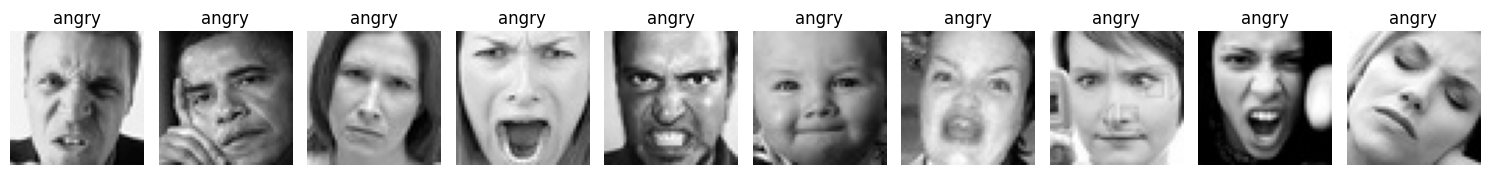

In [ ]:
import matplotlib.pyplot as plt

# Display a few sample images with labels
def show_sample_images(images, labels, label_encoder, count=10):
    plt.figure(figsize=(15, 5))
    for i in range(count):
        ax = plt.subplot(1, count, i + 1)
        img = images[i].reshape(48, 48)  # reshape for grayscale display
        plt.imshow(img, cmap='gray')
        label_index = labels[i]
        label = label_encoder.inverse_transform([label_index])[0]
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
show_sample_images(train_images, train_labels, le)


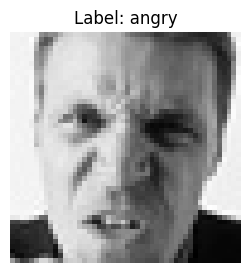

In [ ]:
import matplotlib.pyplot as plt

# Function to show a single image by index
def show_single_image(index, images, labels, label_encoder):
    img = images[index].reshape(48, 48)
    label = label_encoder.inverse_transform([labels[index]])[0]

    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Example: Show image at index 0
show_single_image(0, train_images, train_labels, le)


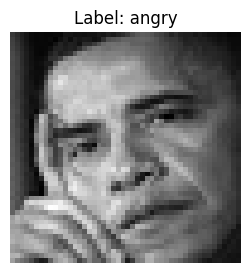

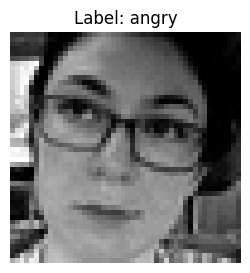

In [ ]:
show_single_image(1, train_images, train_labels, le)  # Shows second image
show_single_image(25, train_images, train_labels, le)  # Shows 26th image


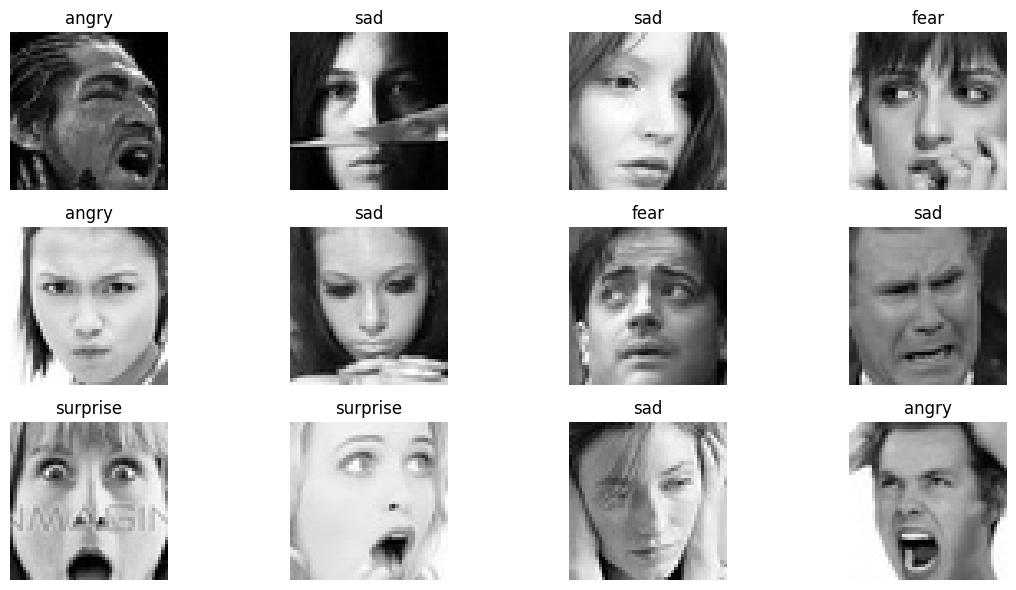

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Show 12 random images from the training set
def show_random_images(images, labels, label_encoder, num_images=12):
    indices = random.sample(range(len(images)), num_images)
    plt.figure(figsize=(12, 6))

    for i, idx in enumerate(indices):
        img = images[idx].reshape(48, 48)
        label = label_encoder.inverse_transform([labels[idx]])[0]

        plt.subplot(3, 4, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display
show_random_images(train_images, train_labels, le)
